## Multiple systems

We will now look at systems composed by more than one qubit, say $n$.

In [48]:
import qiskit 
from qiskit.quantum_info import Statevector, Operator
import numpy as np 
import matplotlib.pyplot as plt 
from qiskit.visualization import plot_histogram

The two standard basis vector of the computational basis are given by:
\begin{equation}
\ket{+} = \begin{pmatrix}
1 \\
0
\end{pmatrix} \quad \quad \ket{-} = \begin{pmatrix}
0 \\
1
\end{pmatrix}
\end{equation}

In [49]:
# we initialise the two standard basis vector of the computational basis directly from the qiskit library

zero, one = Statevector.from_label('0'), Statevector.from_label('1')
tensor_product = zero.tensor(one)

# visualize the vectors 
display(zero.draw('latex'))
display(one.draw('latex'))
display(tensor_product.draw('latex'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [50]:
# we can do the same with other vectors 
plus, minus  = Statevector.from_label('+'), Statevector.from_label('-')
display(plus.draw('latex'), minus.draw('latex'))

p_tensor_m = plus.tensor(minus)
display(p_tensor_m.draw('latex'))

m_tensor_p = minus.tensor(plus)
display(m_tensor_p.draw('latex'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

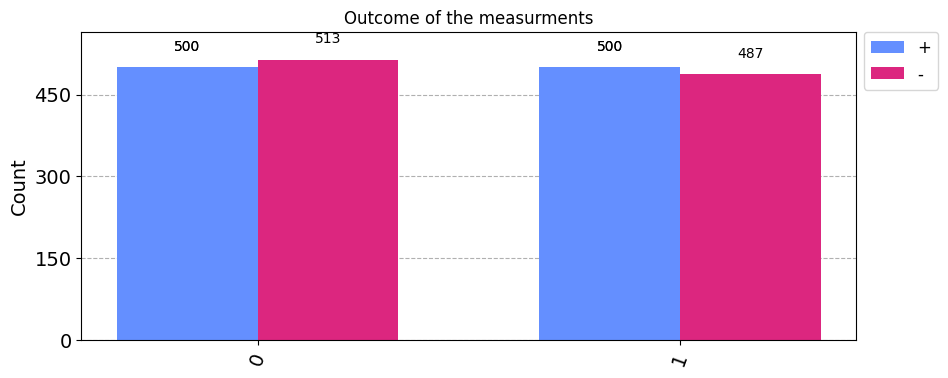

In [51]:
# we can also measure these states and plot the results 

stats_plus = plus.sample_counts(1000)
stats_minus = minus.sample_counts(1000)
total_stats = [stats_plus, stats_minus]
plot_histogram(total_stats, legend = ['+','-'], title = 'Outcome of the measurments', figsize = [10,4])



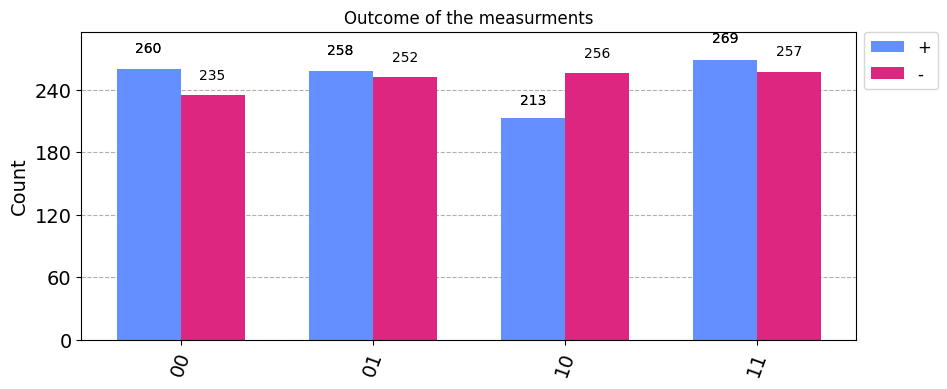

In [52]:
# we can also measure these states and plot the results 

stats_ptm = p_tensor_m.sample_counts(1000)
stats_mpt = m_tensor_p.sample_counts(1000)
total_stats = [stats_ptm , stats_mpt]
label = [r'+',r'-']
plot_histogram(total_stats, legend = label, title = 'Outcome of the measurments', figsize = [10,4])

In [53]:
# one can also take tensor product between operators and act on tensor product states 
# let us import the pauli gates from the library 

X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')
# display(X.draw('latex'))
# display(Y.draw('latex'))
# display(Z.draw('latex'))

# these gates act on single qubits, for example we can see the action of the X gate on the standard basis vector 

not_0 = zero.evolve(X)
not_1 = one.evolve(X)

display(zero.draw('latex'))
display(one.draw('latex'))
display(not_0.draw('latex'))
display(not_1.draw('latex'))

# we can see that the gate acts as the classical NOT gate 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

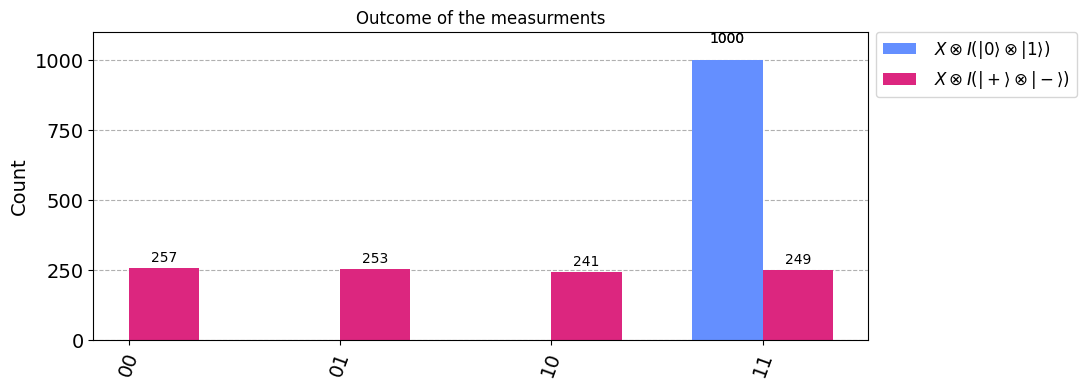

In [54]:
# let us now consider the action on tensor product states
I = Operator.from_label('I')
X_tensor_I = X.tensor(I)
display(X_tensor_I.draw('latex'))

tensor_product_evolved = tensor_product.evolve(X_tensor_I)
p_tensor_m_evolved  = p_tensor_m.evolve(X_tensor_I)

display(tensor_product_evolved.draw('latex'))
display(p_tensor_m_evolved.draw('latex'))

stats_t_evolved = tensor_product_evolved.sample_counts(1000)
stats_ptm_evolved = p_tensor_m_evolved.sample_counts(1000)
total_stats = [stats_t_evolved, stats_ptm_evolved]
label = [r' $X \otimes I \left( | 0 \rangle \otimes | 1 \rangle \right) $', r' $ X \otimes I \left(| + \rangle \otimes  | - \rangle \right) $']
plot_histogram(total_stats, legend = label, title = 'Outcome of the measurments', figsize = [10,4])